In [41]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [42]:
path = '../data/kaggle/sample_media_spend.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


In [74]:
grouped = df.groupby(['Calendar_Week']) # agrupor por semana
resumen = grouped.agg({'Affiliate_Impressions': 'mean','Email_Impressions': 'mean' ,'Overall_Views': 'mean', 'Sales': 'mean'}).reset_index() #calcular estadísticas
resumen

,Calendar_Week,Affiliate_Impressions,Email_Impressions,Overall_Views,Sales
0,1/11/2020,17929.111111,797327.322286,48298.407407,156981.000000
1,1/12/2019,27738.851852,710753.108461,19197.666667,108817.925926
2,1/13/2018,36425.740741,989220.739774,633.740741,112732.148148
3,1/18/2020,18211.888889,755389.341656,60497.000000,180169.111111
4,1/19/2019,29851.037037,892006.220104,19095.703704,139572.851852
...,...,...,...,...,...
108,9/22/2018,15039.777778,639893.496581,506.666667,151806.703704
109,9/28/2019,19520.259259,536097.194730,73976.851852,146729.111111
110,9/29/2018,19369.037037,564578.269051,450.370370,170405.185185
111,9/7/2019,15680.888889,702674.694551,63865.481481,172144.185185


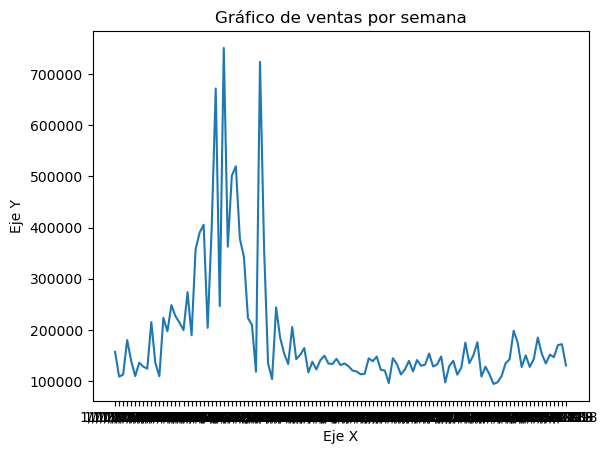

In [75]:
# extraer datos
x = resumen['Calendar_Week']
y1 = resumen['Affiliate_Impressions']
y2 = resumen['Email_Impressions']
y3 = resumen['Overall_Views']
target = resumen['Sales']
# Crear el gráfico de líneas para entender cómo sonn las ventas por división
plt.plot(x, target)
plt.title("Gráfico de ventas por semana")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

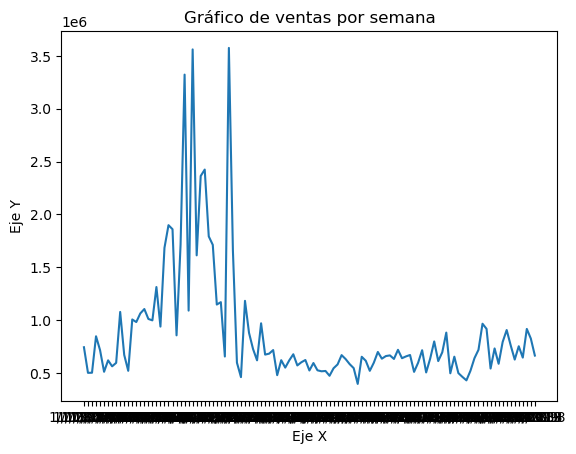

In [71]:
grouped = df.groupby(['Calendar_Week','Division']) # agrupar por semana y división
resumen_aux = grouped.agg({'Affiliate_Impressions': 'mean','Email_Impressions': 'mean' ,'Overall_Views': 'mean', 'Sales': 'mean'}).reset_index()
aux = resumen_aux[resumen_aux['Division'] == 'B'] # saco la división B
x_aux=aux['Calendar_Week']
y1_aux=aux['Affiliate_Impressions']
y2_aux=aux['Email_Impressions']
y3_aux=aux['Overall_Views']
target_aux=aux['Sales']
# Crear el gráfico de líneas para entender cómo sonn las ventas por división
plt.plot(x_aux, target_aux)
plt.title("Gráfico de ventas por semana")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

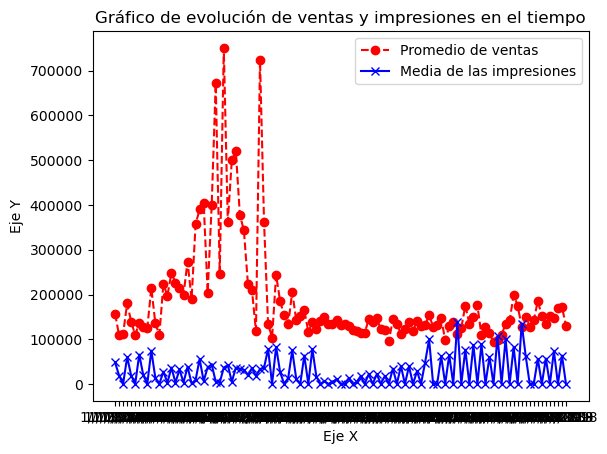

In [76]:
# Crear el gráfico de líneas con dos variables
plt.plot(x, target,linestyle='--', color='r', marker='o', label='Promedio de ventas')
plt.plot(x, y3 , linestyle='-', color='b', marker='x', label='Media de las impresiones')
plt.title("Gráfico de evolución de ventas y impresiones en el tiempo")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.show()

In [77]:
grouped = df.groupby(['Division'])
resumen = grouped.agg({'Affiliate_Impressions': 'mean','Email_Impressions': 'mean' ,'Overall_Views': 'mean', 'Sales': 'mean'}).reset_index()
resumen

,Division,Affiliate_Impressions,Email_Impressions,Overall_Views,Sales
0,A,7887.398230,3.894330e+05,17061.654867,103391.238938
1,B,75675.265487,2.855814e+06,123854.690265,876130.584071
2,C,2365.469027,8.300673e+04,1716.460177,81640.008850
3,D,28466.769912,9.546927e+05,37207.929204,201645.442478
4,E,86570.283186,1.516236e+06,56439.876106,457977.734513
5,F,19044.442478,5.091760e+05,30178.380531,114471.867257
6,G,30306.761062,9.334118e+05,34437.592920,196175.769912
7,H,10985.902655,3.974067e+05,11448.088496,92296.495575
8,I,18505.433628,5.713298e+05,14190.716814,119505.460177
9,J,12806.920354,4.244333e+05,11573.061947,88443.486726


In [78]:
x = resumen['Division']
y1 = resumen['Affiliate_Impressions']
y2 = resumen['Email_Impressions']
y3 = resumen['Overall_Views']
target = resumen['Sales']

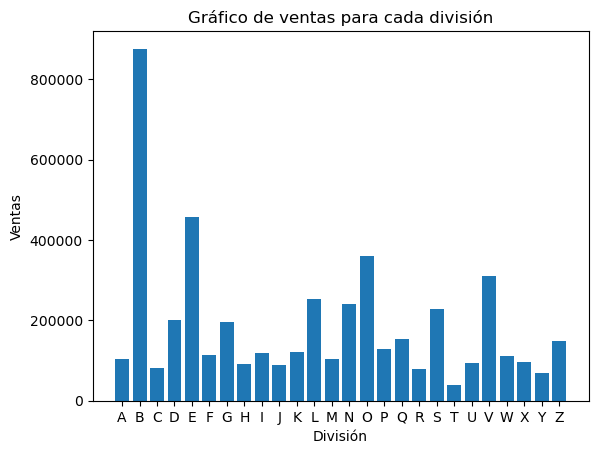

In [79]:
# Crear el gráfico de barras
plt.bar(x, target)
plt.title("Gráfico de ventas para cada división")
plt.xlabel("División")
plt.ylabel("Ventas")
plt.show()

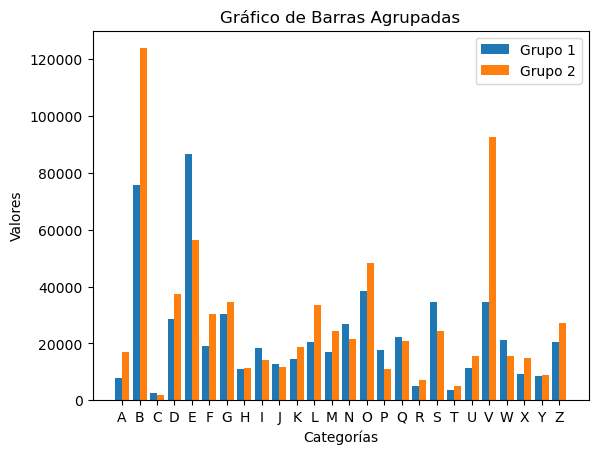

In [59]:
width = 0.4
ind = np.arange(len(x))
# Crear el gráfico de barras agrupadas
plt.bar(ind - width/2, y1, width, label='Grupo 1')
plt.bar(ind + width/2, y3, width, label='Grupo 2')
plt.title("Gráfico de Barras Agrupadas")
plt.xlabel("Categorías")
plt.ylabel("Valores")
plt.xticks(ind, x)
plt.legend()
plt.show()

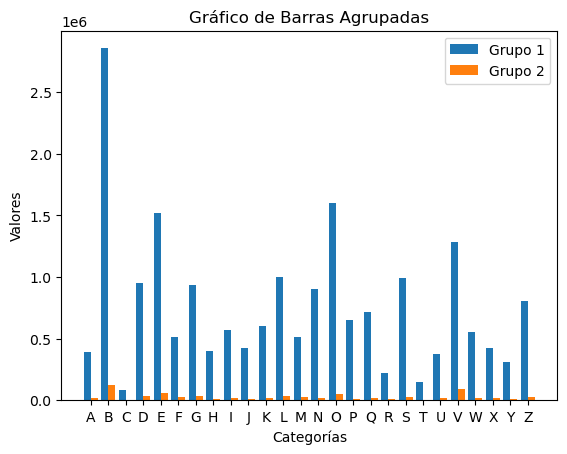

In [80]:
width = 0.4
ind = np.arange(len(x))
# Crear el gráfico de barras agrupadas
plt.bar(ind - width/2, y2, width, label='Grupo 1')
plt.bar(ind + width/2, y3, width, label='Grupo 2')
plt.title("Gráfico de Barras Agrupadas")
plt.xlabel("Categorías")
plt.ylabel("Valores")
plt.xticks(ind, x)
plt.legend()
plt.show()

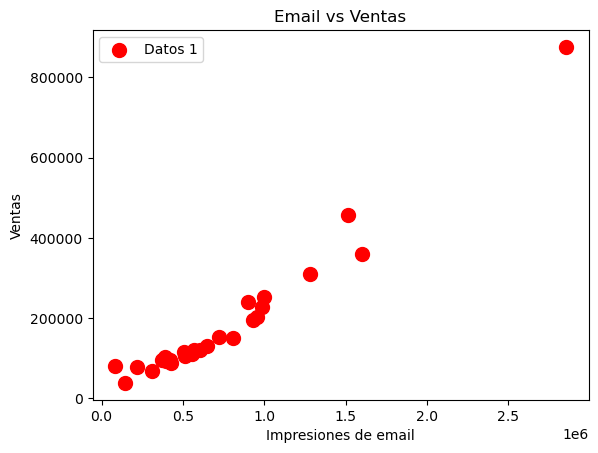

In [85]:
# Crear el gráfico de dispersión con personalización
plt.scatter(y2, target, color='r', marker='o', s=100, label='Datos 1')
plt.title("Email vs Ventas")
plt.xlabel("Impresiones de email")
plt.ylabel("Ventas")
plt.legend()
plt.show()

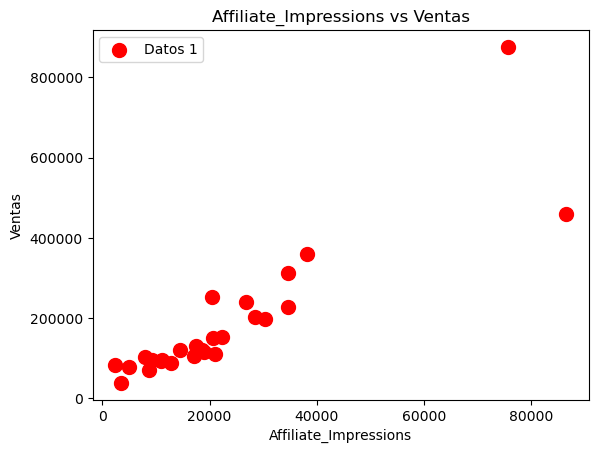

In [86]:
# Crear el gráfico de dispersión con personalización
plt.scatter(y1, target, color='r', marker='o', s=100, label='Datos 1')
plt.title("Affiliate_Impressions vs Ventas")
plt.xlabel("Affiliate_Impressions")
plt.ylabel("Ventas")
plt.legend()
plt.show()

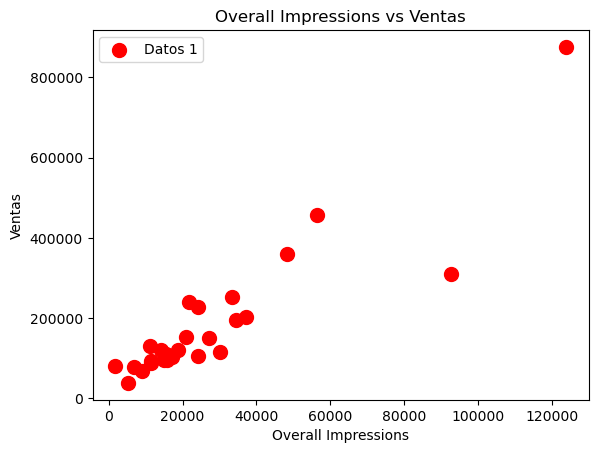

In [88]:
# Crear el gráfico de dispersión con personalización
plt.scatter(y3, target, color='r', marker='o', s=100, label='Datos 1')
plt.title("Overall Impressions vs Ventas")
plt.xlabel("Overall Impressions")
plt.ylabel("Ventas")
plt.legend()
plt.show()